This notebook should be launched from a session of jupyter notebook that was launched from a DB2 command window
To do this, run an administrator DB2 command window as an administrator and type 'jupyter notebook'

Set up the enviornment:

In [2]:
import sys,os,os.path
os.environ['IBM_DB_HOME']='C:\Program Files\IBM\SQLLIB'
!pip install ipython-sql
!pip install ibm_db 
!pip install ibm_db_sa

Restart the Kernel if this is your first time installing the above. The next steps will fail unless you do this.

Import the modules and load the SQL magic

In [1]:
import ibm_db
import ibm_db_sa
import sqlalchemy
%load_ext sql

Connect to the database. Change the values of user, host, and password to match your environment. For connection to a local host, use 'localhost' for the host name. Also change the port number and database name in the connection string.

In [4]:
user='db2admin'
host='localhost'
# Define filename for passwords
filename = 'ember_variables.py'
# source the file
%run $filename
password = LocalDB2password
db='SAMPLE'

%sql db2+ibm_db://$user:$password@$host:50000/$db

'Connected: db2admin@SAMPLE'

In [10]:
inst_memory=%sql select memory_set_type \
    , db_name \
    , sum(memory_set_used)/1024 as used_mb \
from table(mon_get_memory_set(NULL,NULL,-2)) \
group by memory_set_type, db_name
inst_memory

Done.


memory_set_type,db_name,used_mb
APPLICATION,SAMPLE,1
DATABASE,SAMPLE,147
DBMS,None,60
FMP,None,0
PRIVATE,None,15


([<matplotlib.patches.Wedge at 0x25103a5d0b8>,
  <matplotlib.text.Text at 0x25103a70a90>])

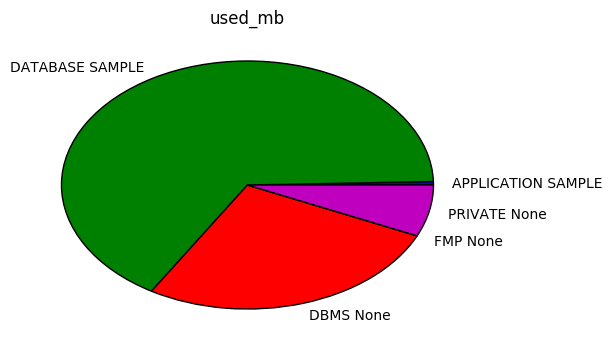

In [11]:
%matplotlib inline
inst_memory.pie()

In [16]:
db_memory=%sql select memory_set_type \
    , memory_pool_type \
    , sum(memory_pool_used)/1024 as used_mb \
from table(mon_get_memory_pool(NULL,:db,-2)) \
where db_name=:db \
group by memory_set_type, memory_pool_type
db_memory

Done.


memory_set_type,memory_pool_type,used_mb
APPLICATION,APPLICATION,0
APPLICATION,APPL_SHARED,0
DATABASE,BP,9
DATABASE,CAT_CACHE,0
DATABASE,DATABASE,117
DATABASE,LOCK_MGR,17
DATABASE,PACKAGE_CACHE,1
DATABASE,SHARED_SORT,2
DATABASE,UTILITY,0
DATABASE,XMLCACHE,0


([<matplotlib.patches.Wedge at 0x25103ace9b0>,
  <matplotlib.text.Text at 0x25103afe208>])

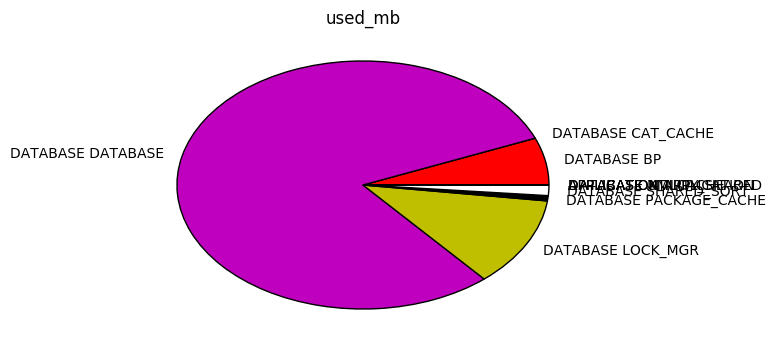

In [17]:
%matplotlib inline
db_memory.pie()